mengimport-import untuk memulai pekerjaan

In [ ]:
# # Import Library
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn.model_selection import train_test_split # Import train_test_split function
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# from sklearn import svm
# from sklearn.model_selection import KFold
# import matplotlib.pyplot as plt



# Utils
import pandas as pd # Dataframe
import numpy as np
import math

# Model related
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier # Ensemble
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Visualisasi
from sklearn import tree # Visualisasi Decision Tree
import matplotlib.pyplot as plt

upload file yang ingin diuji

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving carevaluation.csv to carevaluation (1).csv


In [ ]:
df = pd.read_csv("carevaluation.csv")

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
for col in df.columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


menginialisasi x untuk label selain acceptability dan y untuk selain acceptability

In [ ]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot','safety']]
y = df["acceptability"]

membuat array untuk data uji

In [ ]:
param_dt = {
    'test_size': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'max_depth': [None, 3, 5, 7],
    'criterion': ['entropy']
}


rumus untuk mendapatkan nilai akurasi

In [ ]:
row_format ="{:>10}" * (len(param_dt) + 2)
print(row_format.format('t_size', 'max_depth', 'criterion', 'akurasi', 'f1'))
acc_bfr = -math.inf
for i in param_dt['test_size']:
  for j in param_dt['max_depth']:
    for k in param_dt['criterion']:
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
      dt = DecisionTreeClassifier(random_state=42, max_depth=j, criterion=k)
      dt.fit(X_train, y_train) # fitting

      pred = dt.predict(X_test) # prediksi data testing
      acc = metrics.accuracy_score(y_test, pred) # akurasi prediksi data testing
      f1 = metrics.f1_score(y_test, pred, average='micro') # f1 prediksi data testing
      if(acc > acc_bfr):
        acc_bfr = acc
        best_param_dt = {'t_size': i, 'max_depth': j, 'criterion': k, 'accuracy': acc, 'f1': f1}
        best_dt = dt
      print(row_format.format(str(i), str(j), str(k), '%.3f' % acc, '%.3f' % f1))
print('best param: ', best_param_dt)

    t_size max_depth criterion   akurasi        f1
       0.1      None   entropy     0.960     0.960
       0.1         3   entropy     0.705     0.705
       0.1         5   entropy     0.850     0.850
       0.1         7   entropy     0.931     0.931
       0.2      None   entropy     0.974     0.974
       0.2         3   entropy     0.743     0.743
       0.2         5   entropy     0.867     0.867
       0.2         7   entropy     0.942     0.942
       0.3      None   entropy     0.967     0.967
       0.3         3   entropy     0.757     0.757
       0.3         5   entropy     0.863     0.863
       0.3         7   entropy     0.931     0.931
       0.4      None   entropy     0.964     0.964
       0.4         3   entropy     0.763     0.763
       0.4         5   entropy     0.854     0.854
       0.4         7   entropy     0.931     0.931
       0.5      None   entropy     0.978     0.978
       0.5         3   entropy     0.782     0.782
       0.5         5   entropy 

menampilkan decision tree

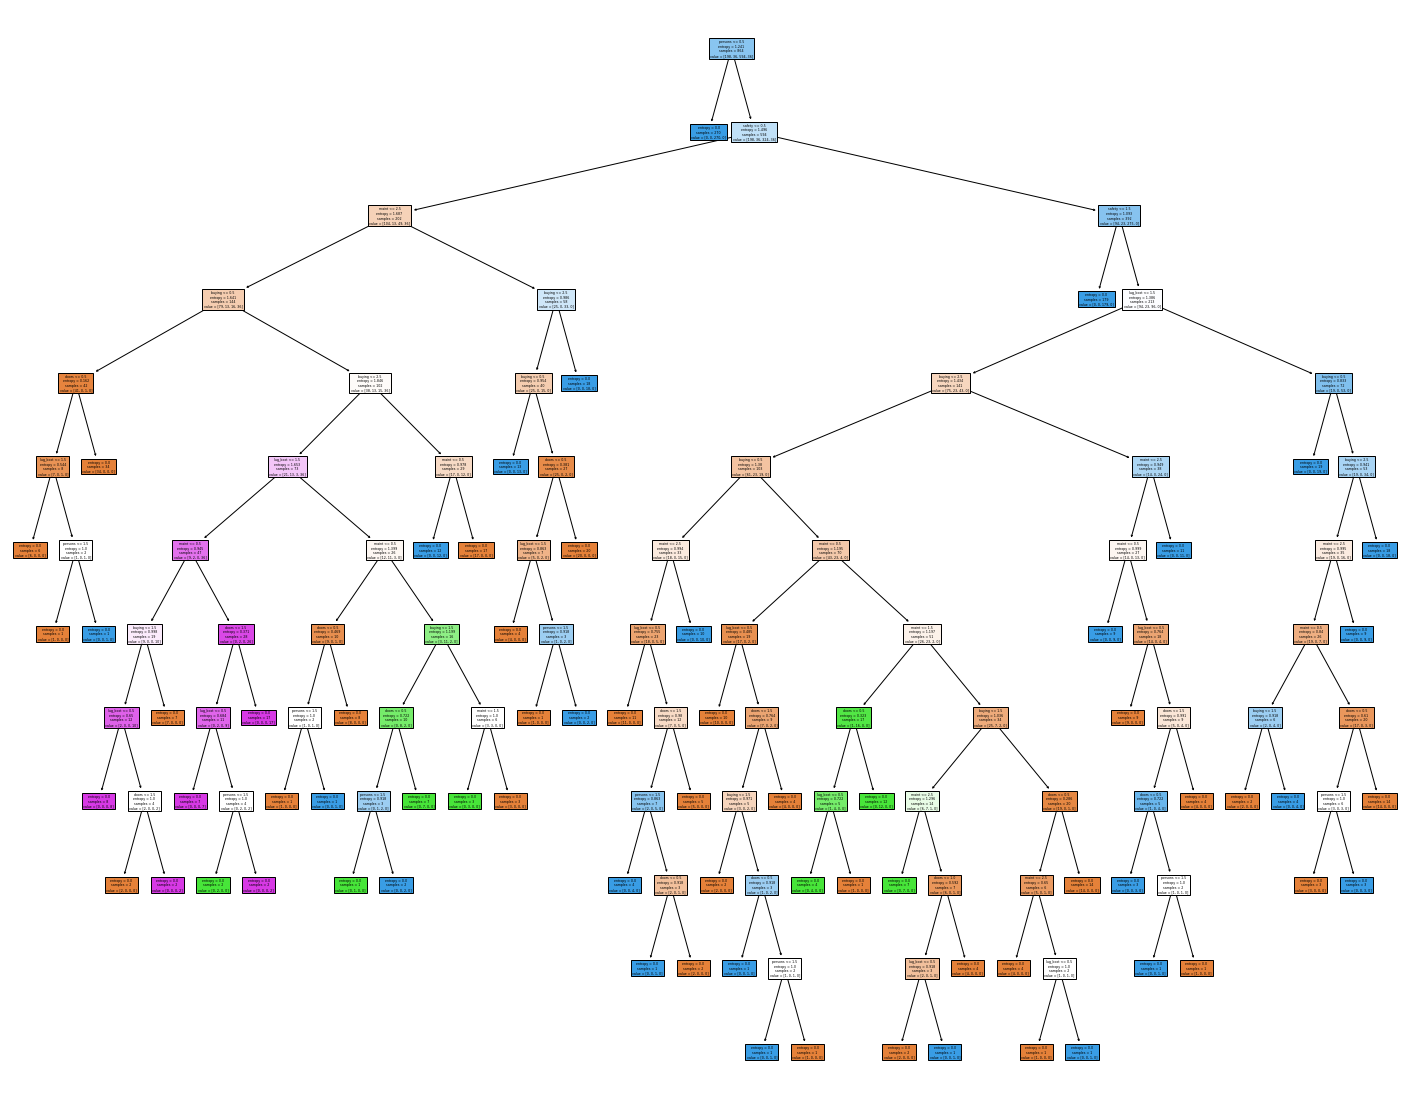

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_dt, 
                   feature_names=df.drop(columns=['acceptability']).columns,  
                   filled=True)